ASSIGNMENT 3

Abalone Age Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Download the dataset

In [2]:
from google.colab import files
uploaded=files.upload()

Saving abalone.csv to abalone.csv


Load the dataset into the tool

In [3]:
# importing the dataset

df = pd.read_csv('abalone.csv')

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Perform Below Visualizations :

Univariate Analysis

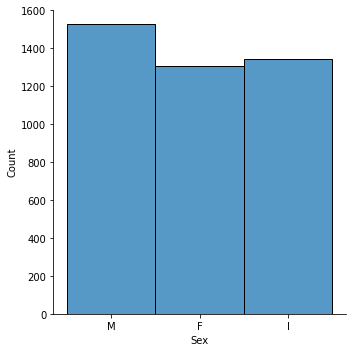

In [9]:
sns.displot(df["Sex"])

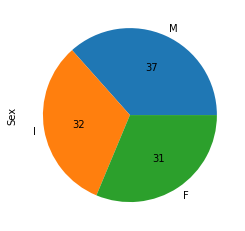

In [8]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.0f')


Bi-Variate Analysis

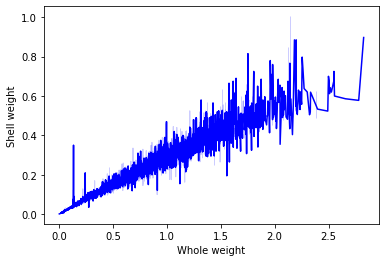

In [10]:
sns.lineplot(x=df['Whole weight'],y=df['Shell weight'],color='blue')

Multi-Variate Analysis

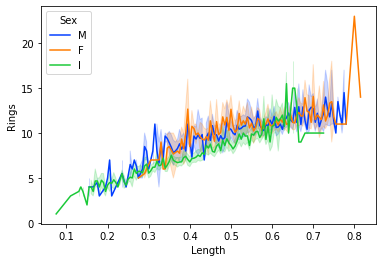

In [13]:
sns.lineplot(x='Length',y='Rings',data=df,palette='bright',hue='Sex');

Perform descriptive statistics on the dataset

In [14]:
df.sum()

Sex               MMFMIIFFMFFMMFFMIFMMMIFFFFFMMMMFMFFMFFFMFFIIII...
Length                                                     2188.715
Diameter                                                    1703.72
Height                                                       582.76
Whole weight                                               3461.656
Shucked weight                                             1501.078
Viscera weight                                             754.3395
Shell weight                                               997.5965
Rings                                                         41493
dtype: object

In [25]:
df.mean()

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [23]:
df.median()

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [24]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.std()

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Rings             3.224169
dtype: float64

In [17]:
df.min()

Sex                    F
Length             0.075
Diameter           0.055
Height               0.0
Whole weight       0.002
Shucked weight     0.001
Viscera weight    0.0005
Shell weight      0.0015
Rings                  1
dtype: object

In [18]:
df.max()

Sex                    M
Length             0.815
Diameter            0.65
Height              1.13
Whole weight      2.8255
Shucked weight     1.488
Viscera weight      0.76
Shell weight       1.005
Rings                 29
dtype: object

In [20]:
df.count()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64

Check for Missing values and deal with them

In [26]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Find the outliers and replace them outliers

In [27]:
qnt  =  df.quantile(q = (0.25,0.75))
iqr = qnt.loc[0.75] - qnt.loc[0.25]

In [28]:
iqr

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64

In [30]:
lower = qnt.loc[0.25] - 1.5*iqr
upper = qnt.loc[0.75] + 1.5 * iqr

In [31]:
lower

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
dtype: float64

In [32]:
upper

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64

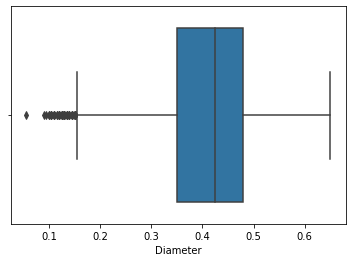

In [33]:
sns.boxplot(df["Diameter"])

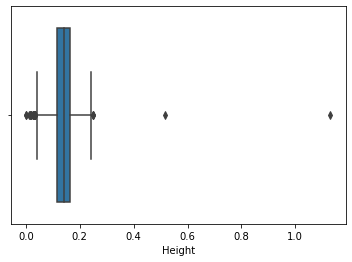

In [34]:
sns.boxplot(df["Height"])

Check for Categorical columns and perform encoding

In [35]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [36]:
df["Sex"].replace({"F":0,"M":1,"I":2},inplace = True)

In [37]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Split the data into dependent and independent variables

In [38]:
x= df.iloc[:,:-1].values
y= df.iloc[:,3].values

In [39]:
x

array([[1.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [1.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [1.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [1.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [40]:
y

array([0.095, 0.09 , 0.135, ..., 0.205, 0.15 , 0.195])

Scale the independent
variables

In [41]:
from sklearn.preprocessing import StandardScaler
rings = df[["Rings","Diameter"]]
scaler = StandardScaler()
scaler.fit(rings)

StandardScaler()

Split the data into training and testing

In [42]:
from sklearn.datasets import make_blobs

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x, y = make_blobs(n_samples=100)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(500, 2) (500, 2) (500,) (500,)


Build the Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
a = knn.predict(x_test)

In [51]:
a

array([2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2,
       0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1,
       2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1,
       2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2,
       2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0,
       2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1,
       0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2,
       0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1,

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [54]:
print("Accuracy score",accuracy_score(y_test,a))

Accuracy score 0.984


In [55]:
confusion_matrix(y_test,a)

array([[167,   0,   2],
       [  0, 158,   0],
       [  6,   0, 167]])